In [1]:
%load_ext autoreload
%autoreload 2
import os
import glob
import matplotlib.pyplot as plt
import numpy as np

Relevant info for all mice in the mpfc composite condition is accessed under _CONSTANTS/conditions.py. Note that
pretraining odors, discrimination odors, etc are all given per individual mouse, which in this case is M2, M3, M4, M6

In [2]:
from _CONSTANTS import conditions

conditions.MPFC_COMPOSITE.__dict__

mappingproxy({'__module__': '_CONSTANTS.conditions',
              'name': 'MPFC_COMPOSITE',
              'paths': ['I:/IMPORTANT DATA/DATA_2P/M2_MPFC/training',
               'I:/IMPORTANT DATA/DATA_2P/M3_MPFC/training',
               'I:/IMPORTANT DATA/DATA_2P/M4_MPFC/training',
               'I:/IMPORTANT DATA/DATA_2P/M6_MPFC/training'],
              'dt_odors': [['pin', 'msy', 'euy', 'lim'],
               ['pin', 'msy', 'euy', 'lim'],
               ['pin', 'msy', 'euy', 'lim'],
               ['pin', 'msy', 'euy', 'lim'],
               ['pin', 'msy', 'euy', 'lim']],
              'dt_csp': [['pin', 'msy'],
               ['pin', 'msy'],
               ['pin', 'msy'],
               ['pin', 'msy'],
               ['pin', 'msy']],
              'pt_odors': [['naive', 'oct'],
               ['naive', 'oct'],
               ['naive', 'oct'],
               ['naive', 'oct']],
              'pt_csp': [['oct'], ['oct'], ['oct'], ['oct']],
              'timing_override': [True, Tr

These are my definintions of days for pretraining (pt) and discrimination (dt). You can also be assessed under
statistics/main_composite, line 191. You can also look through how I analyzed everything and made plots under that file.

In [15]:
data_directory = r'C:\Users\Peter\Desktop\PYTHON\PHD_experiment\_DATA\timepoint\MPFC_COMPOSITE'
pt_start = [1, 1, 1, 1]
pt_learned = [3, 3, 3, 3]
dt_naive = [0, 0, 0, 0]
dt_start = [3, 3, 4, 4]
dt_learned = [4, 4, 5, 5]
dt_end = [8, 8, 5, 8]

Under the data folder are files organized by mouse then day, with a .npy file and a .pkl file per day of imaging

In [16]:
mouse = 'M2'
files = sorted(glob.glob(os.path.join(data_directory, f'*{mouse}*')))
npy_files = [f for f in files if '.npy' in f]
pkl_files = [f for f in files if '.pkl' in f]
assert len(npy_files) == len(pkl_files)
day_files = list(zip(npy_files, pkl_files))
day_files

[('C:\\Users\\Peter\\Desktop\\PYTHON\\PHD_experiment\\_DATA\\timepoint\\MPFC_COMPOSITE\\M2_MPFC__3-21-2018__300.npy',
  'C:\\Users\\Peter\\Desktop\\PYTHON\\PHD_experiment\\_DATA\\timepoint\\MPFC_COMPOSITE\\M2_MPFC__3-21-2018__300.pkl'),
 ('C:\\Users\\Peter\\Desktop\\PYTHON\\PHD_experiment\\_DATA\\timepoint\\MPFC_COMPOSITE\\M2_MPFC__3-23-2018__300.npy',
  'C:\\Users\\Peter\\Desktop\\PYTHON\\PHD_experiment\\_DATA\\timepoint\\MPFC_COMPOSITE\\M2_MPFC__3-23-2018__300.pkl'),
 ('C:\\Users\\Peter\\Desktop\\PYTHON\\PHD_experiment\\_DATA\\timepoint\\MPFC_COMPOSITE\\M2_MPFC__3-25-2018__300.npy',
  'C:\\Users\\Peter\\Desktop\\PYTHON\\PHD_experiment\\_DATA\\timepoint\\MPFC_COMPOSITE\\M2_MPFC__3-25-2018__300.pkl'),
 ('C:\\Users\\Peter\\Desktop\\PYTHON\\PHD_experiment\\_DATA\\timepoint\\MPFC_COMPOSITE\\M2_MPFC__3-26-2018__300.npy',
  'C:\\Users\\Peter\\Desktop\\PYTHON\\PHD_experiment\\_DATA\\timepoint\\MPFC_COMPOSITE\\M2_MPFC__3-26-2018__300.pkl'),
 ('C:\\Users\\Peter\\Desktop\\PYTHON\\PHD_experiment

In [17]:
'''
M2 is the first mouse of this condition, so the index is 0.
'''

all_odors = conditions.MPFC_COMPOSITE.dt_odors[0]
csp_odors = conditions.MPFC_COMPOSITE.dt_csp[0]
odor_dict = {x: 'CS+' if x in csp_odors else 'CS-' for x in all_odors}
odor_dict

{'pin': 'CS+', 'msy': 'CS+', 'euy': 'CS-', 'lim': 'CS-'}

The numpy file gives you the raw calcium activity, in the form of [cells, frames per trial X trial]

In [18]:
from tools import file_io

data = file_io.load_numpy(day_files[-1][0])
print(data.shape)

(58, 4500)


The pickle file stores an instance of a class Cons object. You can look at what Cons does in init\cons.py. Basically
it has all the attributes that you need for downstream analysis

In [19]:
cons = file_io.load_pickle(day_files[-1][1])
cons.__dict__

{'DIR': 'E:\\IMPORTANT DATA\\DATA_2P\\M2_MPFC\\4-01-2018\\300',
 'FILE_BANDPASS': 'E:\\IMPORTANT DATA\\DATA_X\\M2_MPFC\\4-01-2018\\m.tif',
 'DAQ_SAMP': 50.0,
 'DAQ_W_ON_F': 44,
 'DEFAULT_O_OFF': 7.7,
 'DAQ_O_ON_F': 25,
 'NAME_MOUSE': 'M2_MPFC',
 'KEY_EFTY': '_EFTY',
 'DIR_STORAGE_ROI': 'E:\\IMPORTANT DATA\\STORAGE_ROI',
 'TRIAL_PERIOD': 0.229711903005393,
 'ODOR_TRIALS': ['msy',
  'euy',
  'water',
  'lim',
  'pin',
  'msy',
  'euy',
  'water',
  'lim',
  'pin',
  'msy',
  'euy',
  'water',
  'lim',
  'pin',
  'msy',
  'euy',
  'water',
  'lim',
  'pin',
  'lim',
  'pin',
  'water',
  'euy',
  'msy',
  'lim',
  'pin',
  'water',
  'euy',
  'msy',
  'lim',
  'pin',
  'water',
  'euy',
  'msy',
  'lim',
  'pin',
  'water',
  'euy',
  'msy',
  'pin',
  'lim',
  'msy',
  'euy',
  'water',
  'pin',
  'lim',
  'msy',
  'euy',
  'water',
  'pin',
  'lim',
  'msy',
  'euy',
  'water',
  'pin',
  'lim',
  'msy',
  'euy',
  'water'],
 'DIR_EFTY_SEPK': 'E:\\IMPORTANT DATA\\DATA_X\\M2_MPFC\\4-01-2

Here are the relevant timings in frames. Note that the trace interval between odor off and water on is
 indeed less than 3 s. This is because in the definition of 3 s I did not take into account the solenoid valve delay,
  which is roughly ~0.7 s

In [43]:
frames_per_trial = cons.TRIAL_FRAMES
odor_on_in_frames = cons.DAQ_O_ON_F
odor_off_in_frames = cons.DAQ_O_OFF_F
water_on_in_frames = cons.DAQ_W_ON_F
trial_period = cons.TRIAL_PERIOD

t_trace = (water_on_in_frames - odor_off_in_frames) * trial_period
print(f'{t_trace} s')

2.29711903005393 s


DAQ_DATA contains the raw TTL signals and analog outputs of PID signals

(1000, 9, 60)


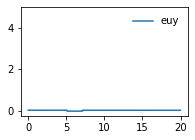

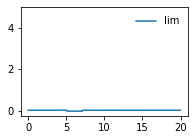

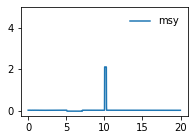

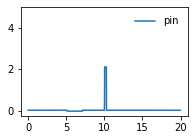

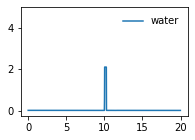

In [41]:
print(cons.DAQ_DATA.shape) # in shape of samples by channels by trials

odor_names = cons.ODOR_UNIQUE
odor_ixs = cons.ODOR_TRIALIDX

for i, odor_name in enumerate(odor_names):
    ixs = np.argwhere(odor_ixs == i).flatten()
    odor_data = cons.DAQ_DATA[:, cons.DAQ_W, ixs].mean(axis=1)
    t = np.arange(odor_data.shape[0]) / cons.DAQ_SAMP
    plt.figure(figsize=(3, 2))
    plt.plot(t, odor_data, label=odor_name)
    plt.ylim([-0.25, 5])
    plt.legend(frameon=False)

For instance let's make some raw PSTHs based on this  day's imaging in response to all odor conditions

<>:18: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:18: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\Peter\AppData\Local\Temp/ipykernel_2204/3460511025.py:18: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  label = f'{odor_name}_{odor_valence}' if odor_valence is not '' else odor_name


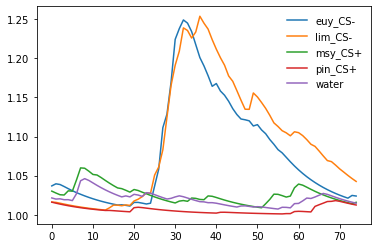

In [20]:
odor_names = cons.ODOR_UNIQUE
odor_ixs = cons.ODOR_TRIALIDX

cell_id = 22 # random cell that has nice responses ;)
data_r = data.reshape(data.shape[0], -1, frames_per_trial) # reshape data into [cells, trials, frame_per_trial]
plt.figure()
for i, odor_name in enumerate(odor_names):
    ixs = np.argwhere(odor_ixs == i).flatten()
    odor_data = data_r[cell_id, ixs, :].mean(axis=0)
    if odor_name in odor_dict.keys():
        odor_valence = odor_dict[odor_name]
    else:
        odor_valence = ''
    label = f'{odor_name}_{odor_valence}' if odor_valence is not '' else odor_name
    plt.plot(odor_data, label=label)
plt.legend(frameon=False)